The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


<string>:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
<string>:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


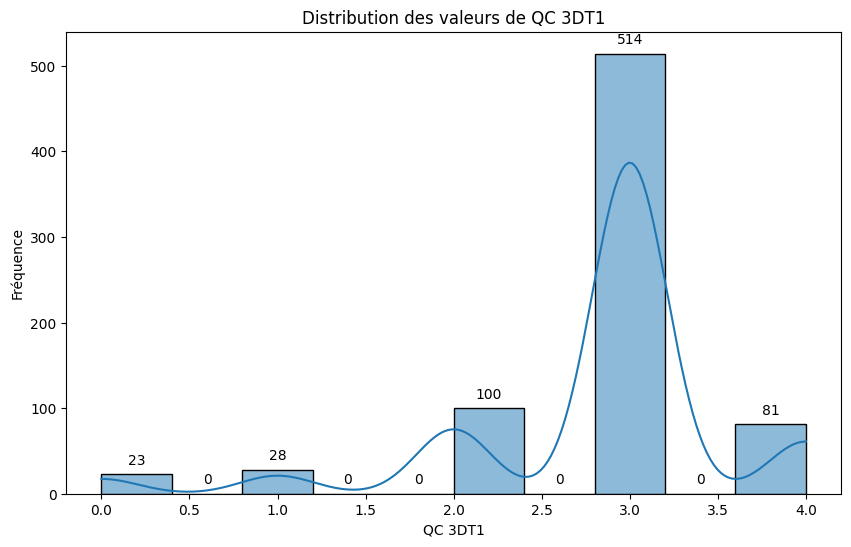

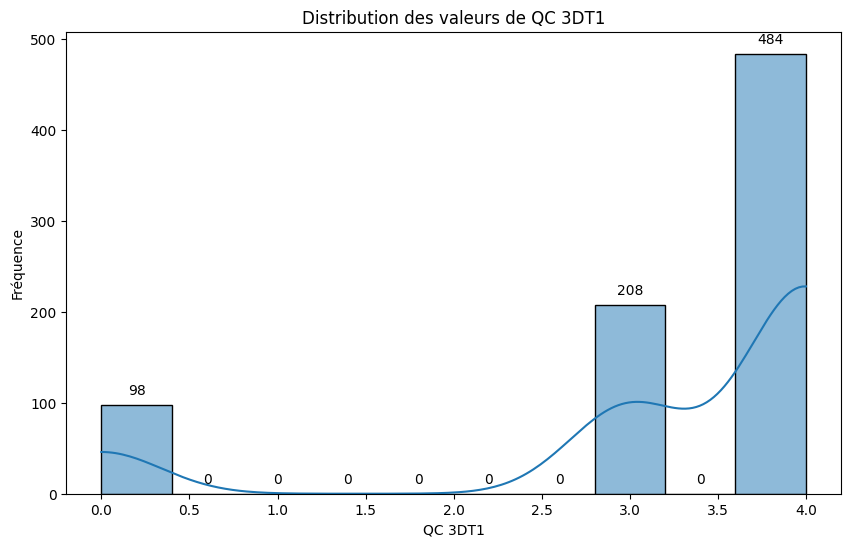

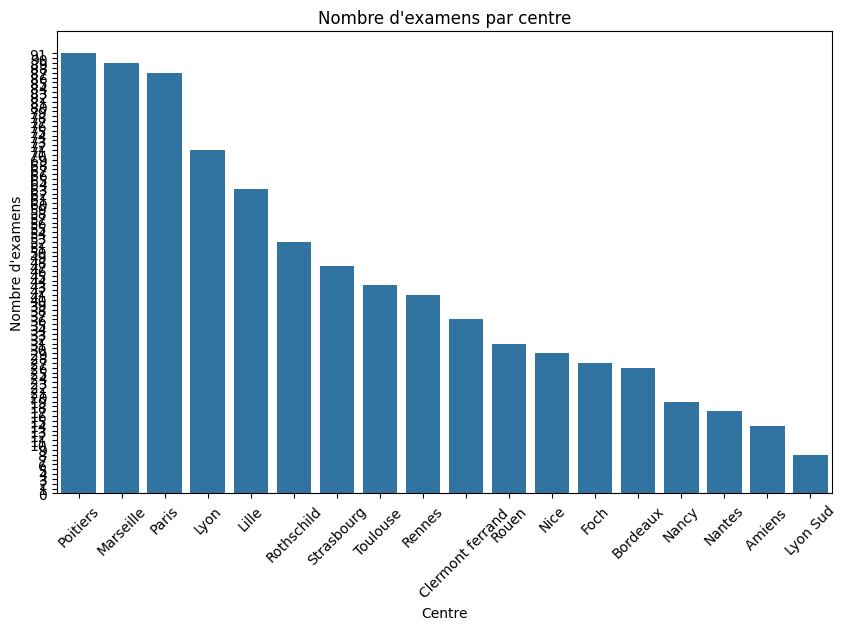

<Figure size 640x480 with 0 Axes>

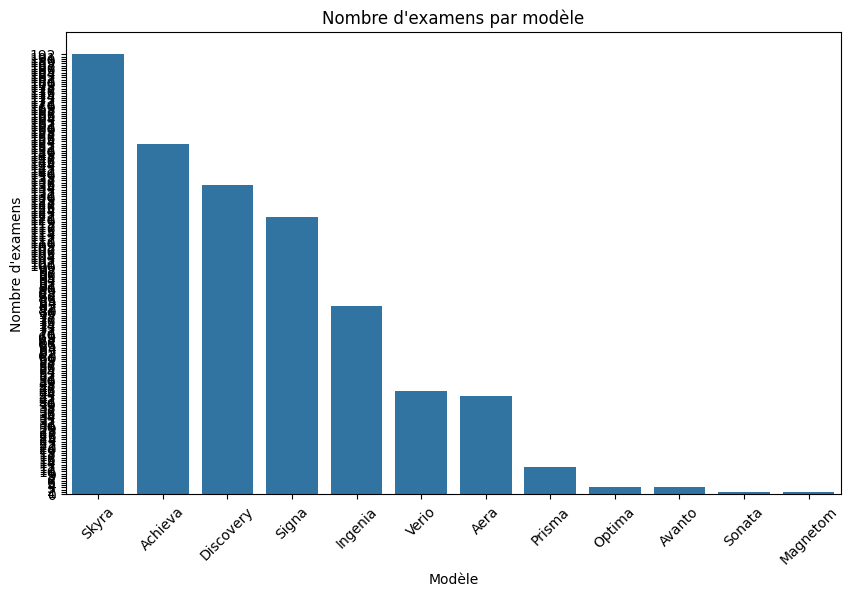

<Figure size 640x480 with 0 Axes>

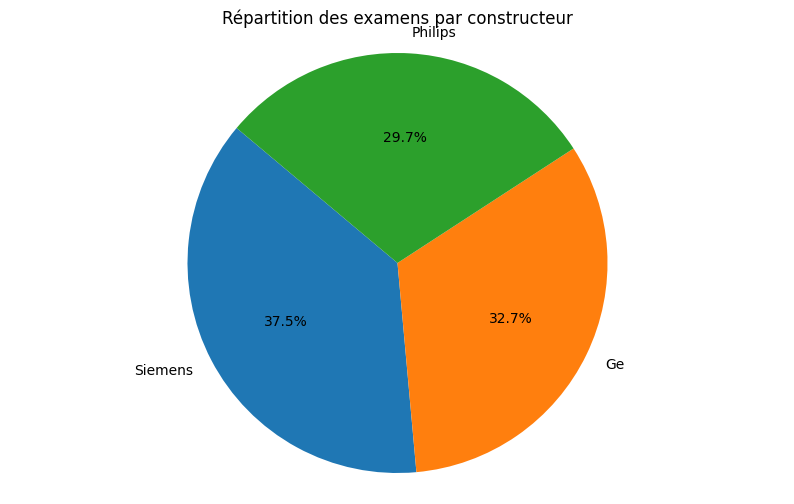

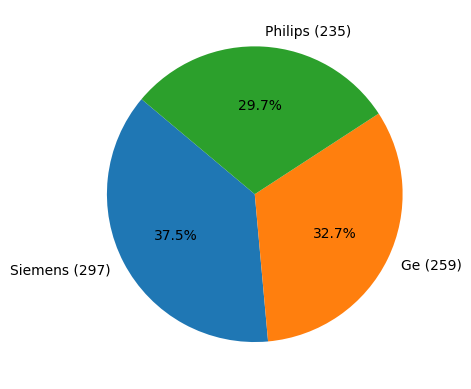

In [1]:
try:
    import import_ipynb
except :
    !pip install import_ipynb
    import import_ipynb
import Predistim_Library as pl


In [2]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
np.set_printoptions(precision=3)
df1 = pd.read_excel(os.path.join(pl.STUDY_PATH,"csv_xlsx",'Analyse_Imagerie_Predistim_V4_20210208.xlsx'),engine='openpyxl',index_col=0)
df1.rename(columns={'MoCA_TOT _V0':'MoCA_TOT_V0'},inplace=True)
#df2 = pd.read_excel(os.path.join(STUDY_PATH,'Bio_Ima_Gen_V5_20210210.xlsx'),engine='openpyxl',index_col=0)
df2 = pd.read_excel(os.path.join(pl.STUDY_PATH,"csv_xlsx",'Bio_Ima_Gen_V3_20210205.xlsx'),engine='openpyxl',index_col=0)
df3 = pd.read_excel(os.path.join(pl.STUDY_PATH,"csv_xlsx",'FOG_ThomasO_20210205.xlsx'),engine='openpyxl',index_col=0,converters={'PatientNB':str})
df3 = df3.dropna(subset={'FOGQ4 V0','FOGQ4 V1'})['Différence FOGQ somme V0-V1 gravité']

In [9]:
df2=df2.loc[:,~df2.columns.str.startswith('R2_')]
df2=df2.loc[:,~df2.columns.str.startswith('QSM_')]
df2=df2.loc[:,~df2.columns.str.startswith('3DT1_')]
df1=df1.loc[:,~df1.columns.str.startswith('R2_')]

In [11]:
CLU_FILE=os.path.join(pl.STUDY_PATH,"csv_xlsx",'Predistim_CT_NC_listing_pts_Cluster-MBereau.xlsx')
df4 = pd.read_excel(CLU_FILE)
print(df4.columns)

Index(['PatientNB', 'SUBJID', 'Cluster', 'Alteration_sup_1DS', 'MCIpoststim'], dtype='object')


In [12]:
#df4['PatientNB'] = df4['PatientNB'].astype(str).str.zfill(6)
#df4.set_index('PatientNB', inplace=True)

In [13]:
df1.index = df1.index.str[:-2]
df2.index = df2.index.str[:-2]

#df4.index = df4.index.str.slice(0, 2) + df4.index.str.slice(3)
#df1_common = df1.join(df4[['Cluster', 'Alteration_sup_1DS', 'MCIpoststim']], how='inner')
#df_common=df1_common.join(df2[['CQT1', 'CQTE']], how='left')
df_common=df1.join(df2[['CQT1', 'CQTE']], how='left')
df_common.describe()

,Age,DIS_DUR_DIAG_V0,BMI,Sexe,Centre,UPDRS_III_WOFF_V0,DOPA_SEN_V0,UPDRS_TOT_OFF_V0,HY_OFF_V0,UPDRS_I _V0,...,UPDRS_IV _V0,UPDRS_TOT_ON_V0,HY_ON_V0,SE_ON_V0,SE_OFF_V0,MoCA_TOT_V0,PDQ39_TOT_V0,LEDD _TOT _V0,CQT1,CQTE
count,428.000000,426.000000,389.000000,428.000000,428.000000,410.000000,409.000000,409.000000,405.000000,406.000000,...,401.000000,398.000000,383.000000,391.000000,406.000000,395.000000,410.000000,372.000000,428.000000,428.000000
mean,60.102804,9.544601,24.784285,1.348131,9.165888,41.714634,74.443032,78.234719,2.606173,11.825123,...,8.486284,37.087940,1.347258,93.375959,68.177340,26.387342,52.429268,1604.697434,3.074766,2.789720
std,7.421640,3.893782,4.002659,0.476935,5.861641,16.740476,14.293210,26.675127,0.870209,5.455676,...,3.441720,14.815058,0.852797,8.878631,18.741334,2.659976,20.225891,3405.077862,0.458098,0.536872
min,30.000000,2.000000,15.622619,1.000000,1.000000,7.000000,12.500000,19.000000,1.000000,0.000000,...,0.000000,8.000000,0.000000,20.000000,10.000000,14.000000,8.000000,45.320000,2.000000,2.000000
25%,55.000000,7.000000,22.093170,1.000000,6.000000,29.000000,65.200000,60.000000,2.000000,8.000000,...,6.000000,26.250000,1.000000,90.000000,60.000000,25.000000,37.000000,962.860000,3.000000,2.000000
50%,62.000000,9.000000,24.567474,1.000000,7.000000,39.000000,76.900000,74.000000,2.500000,11.000000,...,8.000000,34.000000,1.500000,100.000000,70.000000,27.000000,52.000000,1291.000000,3.000000,3.000000
75%,66.000000,11.750000,27.281746,2.000000,17.000000,51.000000,84.800000,94.000000,3.000000,15.000000,...,11.000000,45.000000,2.000000,100.000000,80.000000,28.000000,67.000000,1653.750000,3.000000,3.000000
max,73.000000,32.000000,41.914342,2.000000,19.000000,126.000000,100.000000,166.000000,5.000000,32.000000,...,22.000000,98.000000,4.000000,100.000000,100.000000,30.000000,109.000000,62922.560000,4.000000,4.000000


In [14]:
df_common_filtered = df_common[(df_common['CQT1'] > 1) & (df_common['CQTE'] > 1)]
df_common_filtered.describe()

,Age,DIS_DUR_DIAG_V0,BMI,Sexe,Centre,UPDRS_III_WOFF_V0,DOPA_SEN_V0,UPDRS_TOT_OFF_V0,HY_OFF_V0,UPDRS_I _V0,...,UPDRS_IV _V0,UPDRS_TOT_ON_V0,HY_ON_V0,SE_ON_V0,SE_OFF_V0,MoCA_TOT_V0,PDQ39_TOT_V0,LEDD _TOT _V0,CQT1,CQTE
count,428.000000,426.000000,389.000000,428.000000,428.000000,410.000000,409.000000,409.000000,405.000000,406.000000,...,401.000000,398.000000,383.000000,391.000000,406.000000,395.000000,410.000000,372.000000,428.000000,428.000000
mean,60.102804,9.544601,24.784285,1.348131,9.165888,41.714634,74.443032,78.234719,2.606173,11.825123,...,8.486284,37.087940,1.347258,93.375959,68.177340,26.387342,52.429268,1604.697434,3.074766,2.789720
std,7.421640,3.893782,4.002659,0.476935,5.861641,16.740476,14.293210,26.675127,0.870209,5.455676,...,3.441720,14.815058,0.852797,8.878631,18.741334,2.659976,20.225891,3405.077862,0.458098,0.536872
min,30.000000,2.000000,15.622619,1.000000,1.000000,7.000000,12.500000,19.000000,1.000000,0.000000,...,0.000000,8.000000,0.000000,20.000000,10.000000,14.000000,8.000000,45.320000,2.000000,2.000000
25%,55.000000,7.000000,22.093170,1.000000,6.000000,29.000000,65.200000,60.000000,2.000000,8.000000,...,6.000000,26.250000,1.000000,90.000000,60.000000,25.000000,37.000000,962.860000,3.000000,2.000000
50%,62.000000,9.000000,24.567474,1.000000,7.000000,39.000000,76.900000,74.000000,2.500000,11.000000,...,8.000000,34.000000,1.500000,100.000000,70.000000,27.000000,52.000000,1291.000000,3.000000,3.000000
75%,66.000000,11.750000,27.281746,2.000000,17.000000,51.000000,84.800000,94.000000,3.000000,15.000000,...,11.000000,45.000000,2.000000,100.000000,80.000000,28.000000,67.000000,1653.750000,3.000000,3.000000
max,73.000000,32.000000,41.914342,2.000000,19.000000,126.000000,100.000000,166.000000,5.000000,32.000000,...,22.000000,98.000000,4.000000,100.000000,100.000000,30.000000,109.000000,62922.560000,4.000000,4.000000


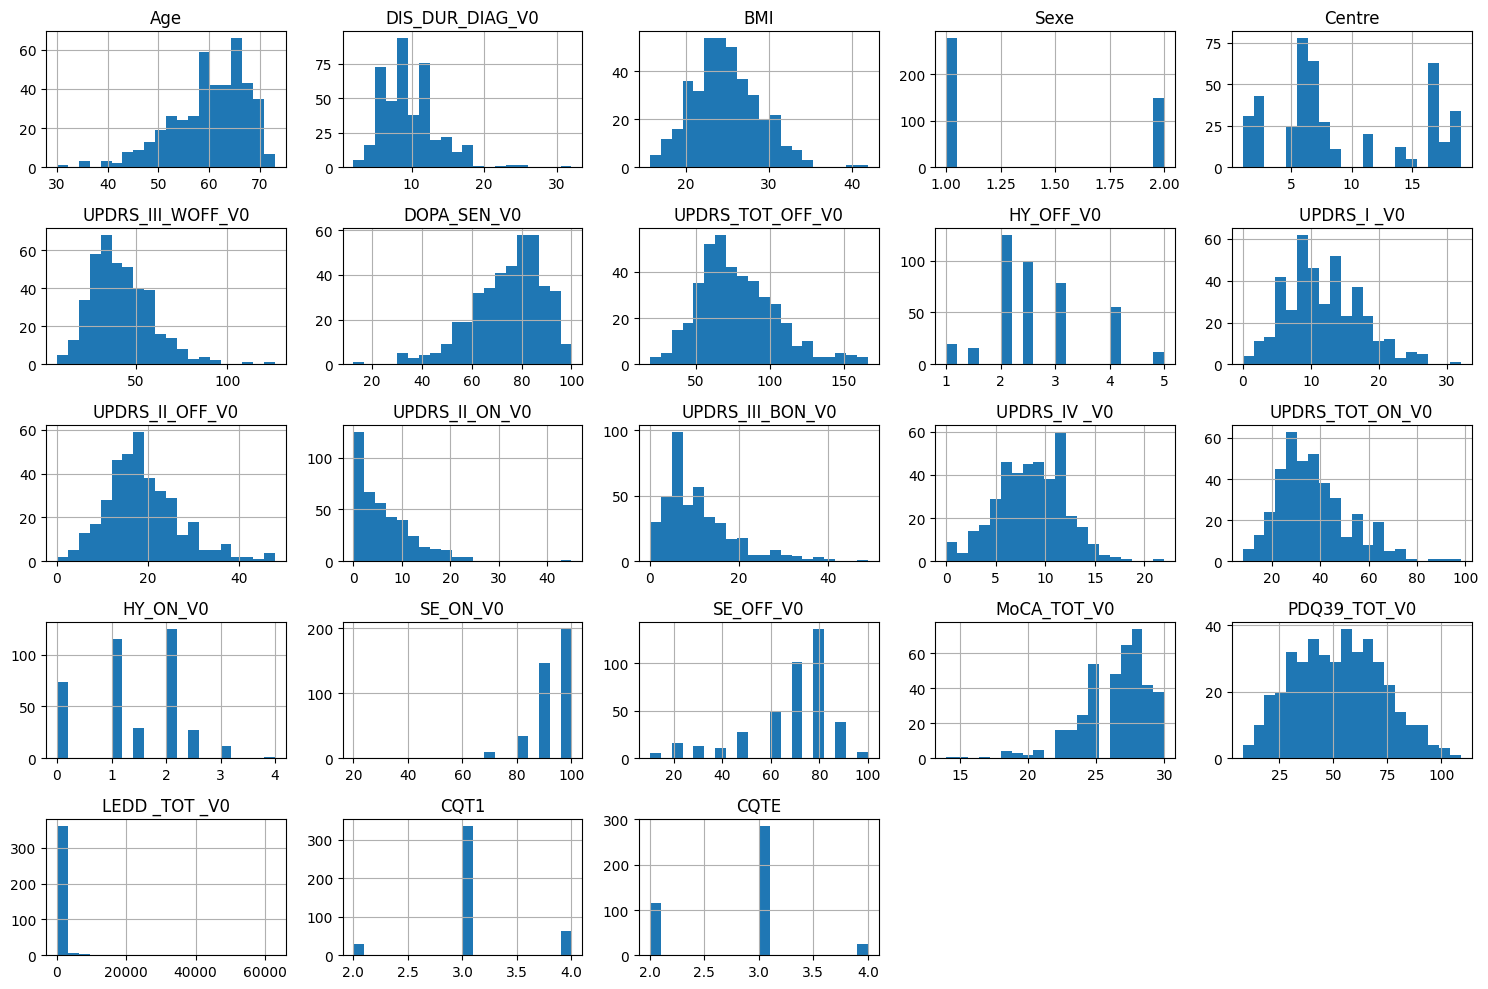

In [15]:
df_common_filtered.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

In [16]:
listcovar=list(df_common_filtered.columns[:5])
listtarget=list(df_common_filtered.columns[5:-2])

In [17]:
output_file = os.path.join(pl.STUDY_PATH, 'code/mrGrad_AvivMezer/mrGradOutputs.xlsx')
# Read all sheets from the Excel file and set the first column as the index
sheets_dict = pd.read_excel(output_file, sheet_name=None, engine='openpyxl')

for key, df in sheets_dict.items():
    df.index=df['Row']
    df.drop(columns=['Row'],inplace=True)
    df.index = df.index.str[:-2]

In [18]:
# Initialiser le dictionnaire de dictionnaires
dict_of_dicts = {}

# Parcourir chaque clé et DataFrame dans sheets_dict
for key, df in sheets_dict.items():
    # Séparer les colonnes en 3 axes
    df_axes = {
        'Axe1': df.iloc[:, :7],
        'Axe2': df.iloc[:, 7:14],
        'Axe3': df.iloc[:, 14:]
    }
    # Ajouter au dictionnaire de dictionnaires
    dict_of_dicts[key] = df_axes

# Afficher un exemple pour vérifier
print(dict_of_dicts['Left-Thalamus']['Axe1'].head())
print(dict_of_dicts['Left-Thalamus']['Axe2'].head())
print(dict_of_dicts['Left-Thalamus']['Axe3'].head())

            Var1       Var2       Var3       Var4       Var5       Var6  \
Row                                                                       
01011  26.456408  25.776711  25.164096  26.382776  27.962780  28.497968   
01014  28.167288  28.942124  29.771709  29.315326  28.654027  29.637899   
01015  27.712090  28.951783  28.255735  28.010445  27.379253  28.131630   
01016  25.041882  25.735846  25.486209  24.611914  27.058119  29.082288   
01017  26.929160  27.895730  27.091434  25.950932  26.707861  27.440184   

            Var7  
Row               
01011  28.754446  
01014  30.107465  
01015  28.796807  
01016  31.338071  
01017  28.052048  
            Var8       Var9      Var10      Var11      Var12      Var13  \
Row                                                                       
01011  25.320850  26.183318  26.901198  27.124933  27.303364  26.600208   
01014  25.755239  27.283037  29.092148  30.463480  30.308249  29.633941   
01015  25.660423  26.236034  27.566868  2

In [ ]:
#listofROI=['Left-Thalamus','Left-Caudate','Left-Putamen','Left-Pallidum','Left-Hippocampus','Left-Amygdala','Left-Accumbens-area','Right-Thalamus','Right-Caudate','Right-Putamen','Right-Pallidum','Right-Hippocampus','Right-Amygdala','Right-Accumbens-area']
listofROI=['Left-Caudate','Left-Putamen','Left-Pallidum','Right-Caudate','Right-Putamen','Right-Pallidum']
#listofROI = list(dict_of_dicts.keys())
listofTarget=['DOPA_SEN_V0','UPDRS_III_WOFF_V0','UPDRS_TOT_OFF_V0','UPDRS_II_OFF_V0','UPDRS_IV _V0']
#listofTarget=correlation_results.keys()

In [ ]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Fonction pour tester la corrélation et afficher les résultats
def test_correlations(dict_of_dicts, df_common, listcovar, listtarget):
    results = {}
    for target in listtarget:
        results[target] = {}
        for structure, axes in dict_of_dicts.items():
            results[target][structure] = {}
            for axe, df in axes.items():
                results[target][structure][axe] = pd.DataFrame(index=df.columns, columns=['Correlation', 'P-value'])
                for col in df.columns:
                    merged_df = df_common[listcovar + [target]].join(df[col], how='inner', rsuffix='_sheet')
                    merged_df.dropna(inplace=True)
                    
                    # Supprimer l'influence de "Age" et "BMI"
                    X = merged_df[['Age', 'BMI']]
                    y = merged_df[target]
                    model = LinearRegression().fit(X, y)
                    residuals = y - model.predict(X)
                    
                    corr, p_value = pearsonr(residuals, merged_df[col])
                    results[target][structure][axe].loc[col] = [corr, p_value]
    
    return results

# Appliquer la fonction à chaque dataframe du dictionnaire
correlation_results = test_correlations(dict_of_dicts, df_common, listcovar, listtarget)

            Var1       Var2       Var3       Var4       Var5       Var6  \
01011  27.860752  28.849499  29.862183  28.849271  28.015665  27.213331   
01014  30.370422  29.909959  30.234918  32.302767  33.266672  37.424126   
01015  30.001997  31.939955  33.360275  32.684273  35.440348  33.631451   
01016  29.371270  32.269781  31.838150  29.573196  33.954287  30.406214   
01017  29.616109  31.107736  32.231993  31.416654  32.924976  33.845133   

            Var7  DOPA_SEN_V0  
01011  27.532829         76.0  
01014  32.681618         88.2  
01015  29.329229         76.3  
01016  26.773729         61.1  
01017  31.968822         63.6  


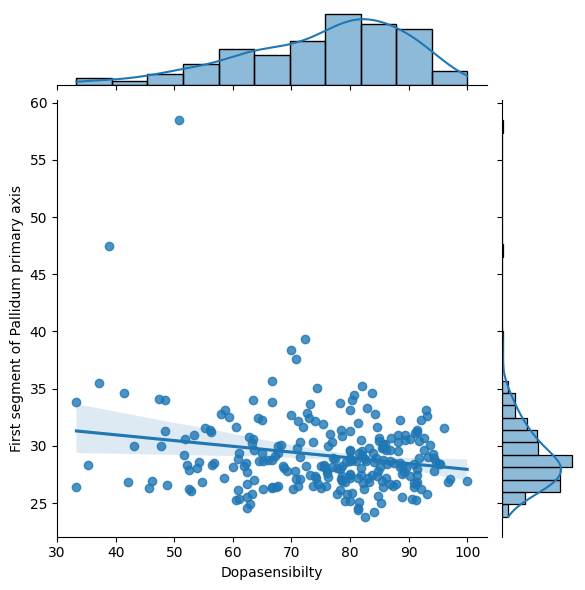

In [289]:
import seaborn as sns

# Joindre les deux DataFrames
df_combined = dict_of_dicts['Left-Putamen']['Axe1'].join(df_common['DOPA_SEN_V0'], how='inner')

# Afficher les premières lignes du DataFrame combiné pour vérifier
print(df_combined.head())

# Create a jointplot between DOPA_SEN_V0 and Var1
jtplot=sns.jointplot(data=df_combined, x='DOPA_SEN_V0', y='Var1', kind='reg')
plt.xlabel('Dopasensibilty')
plt.ylabel('First segment of Pallidum primary axis')
# Save the figure
jtplot.savefig(os.path.join(pl.STUDY_PATH, 'code','mrGrad_AvivMezer','test.jpg'))

/tmp/ipykernel_27397/732749438.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right')


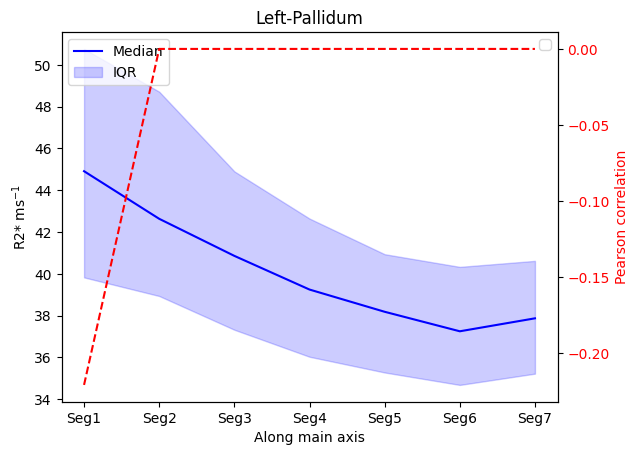

In [282]:
structure='Left-Pallidum'
axe="Axe1"
target=listofTarget[0]
p_value_threshold=0.001
use_median=True
data = dict_of_dicts[structure][axe]
p_values = correlation_results[target][structure][axe]['P-value']
correlations = correlation_results[target][structure][axe]['Correlation']

if (p_values < p_value_threshold).any():
    # Apply threshold to correlations
    correlations = correlations.where(p_values < p_value_threshold, 0)
    
    if use_median:
        central_values = data.median(axis=0)
        lower_bound = data.quantile(0.25, axis=0)
        upper_bound = data.quantile(0.75, axis=0)
    else:
        central_values = data.mean(axis=0)
        lower_bound = central_values - data.std(axis=0)
        upper_bound = central_values + data.std(axis=0)

    plt.plot(central_values, label='Median' if use_median else 'Mean', color='blue')
    plt.fill_between(range(len(central_values)), lower_bound, upper_bound, color='blue', alpha=0.2, label='IQR' if use_median else 'Standard Deviation')
    plt.title(f'{structure}')
    plt.xlabel(f'Along main axis')
    plt.ylabel('R2* ms$^{-1}$')
    plt.legend(loc='upper left')
    
    # Set x-axis tick labels
    plt.xticks(range(len(central_values)), ['Seg1', 'Seg2', 'Seg3', 'Seg4', 'Seg5', 'Seg6', 'Seg7'])
    
    # Create a second y-axis to plot correlations
    ax2 = plt.twinx()
    ax2.plot(correlations, color='red', linestyle='--')
    ax2.set_ylabel('Pearson correlation', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.legend(loc='upper right')
plt.savefig(os.path.join(pl.STUDY_PATH, 'code','mrGrad_AvivMezer','Graph_Left_Pallidum.png'))
plt.show()


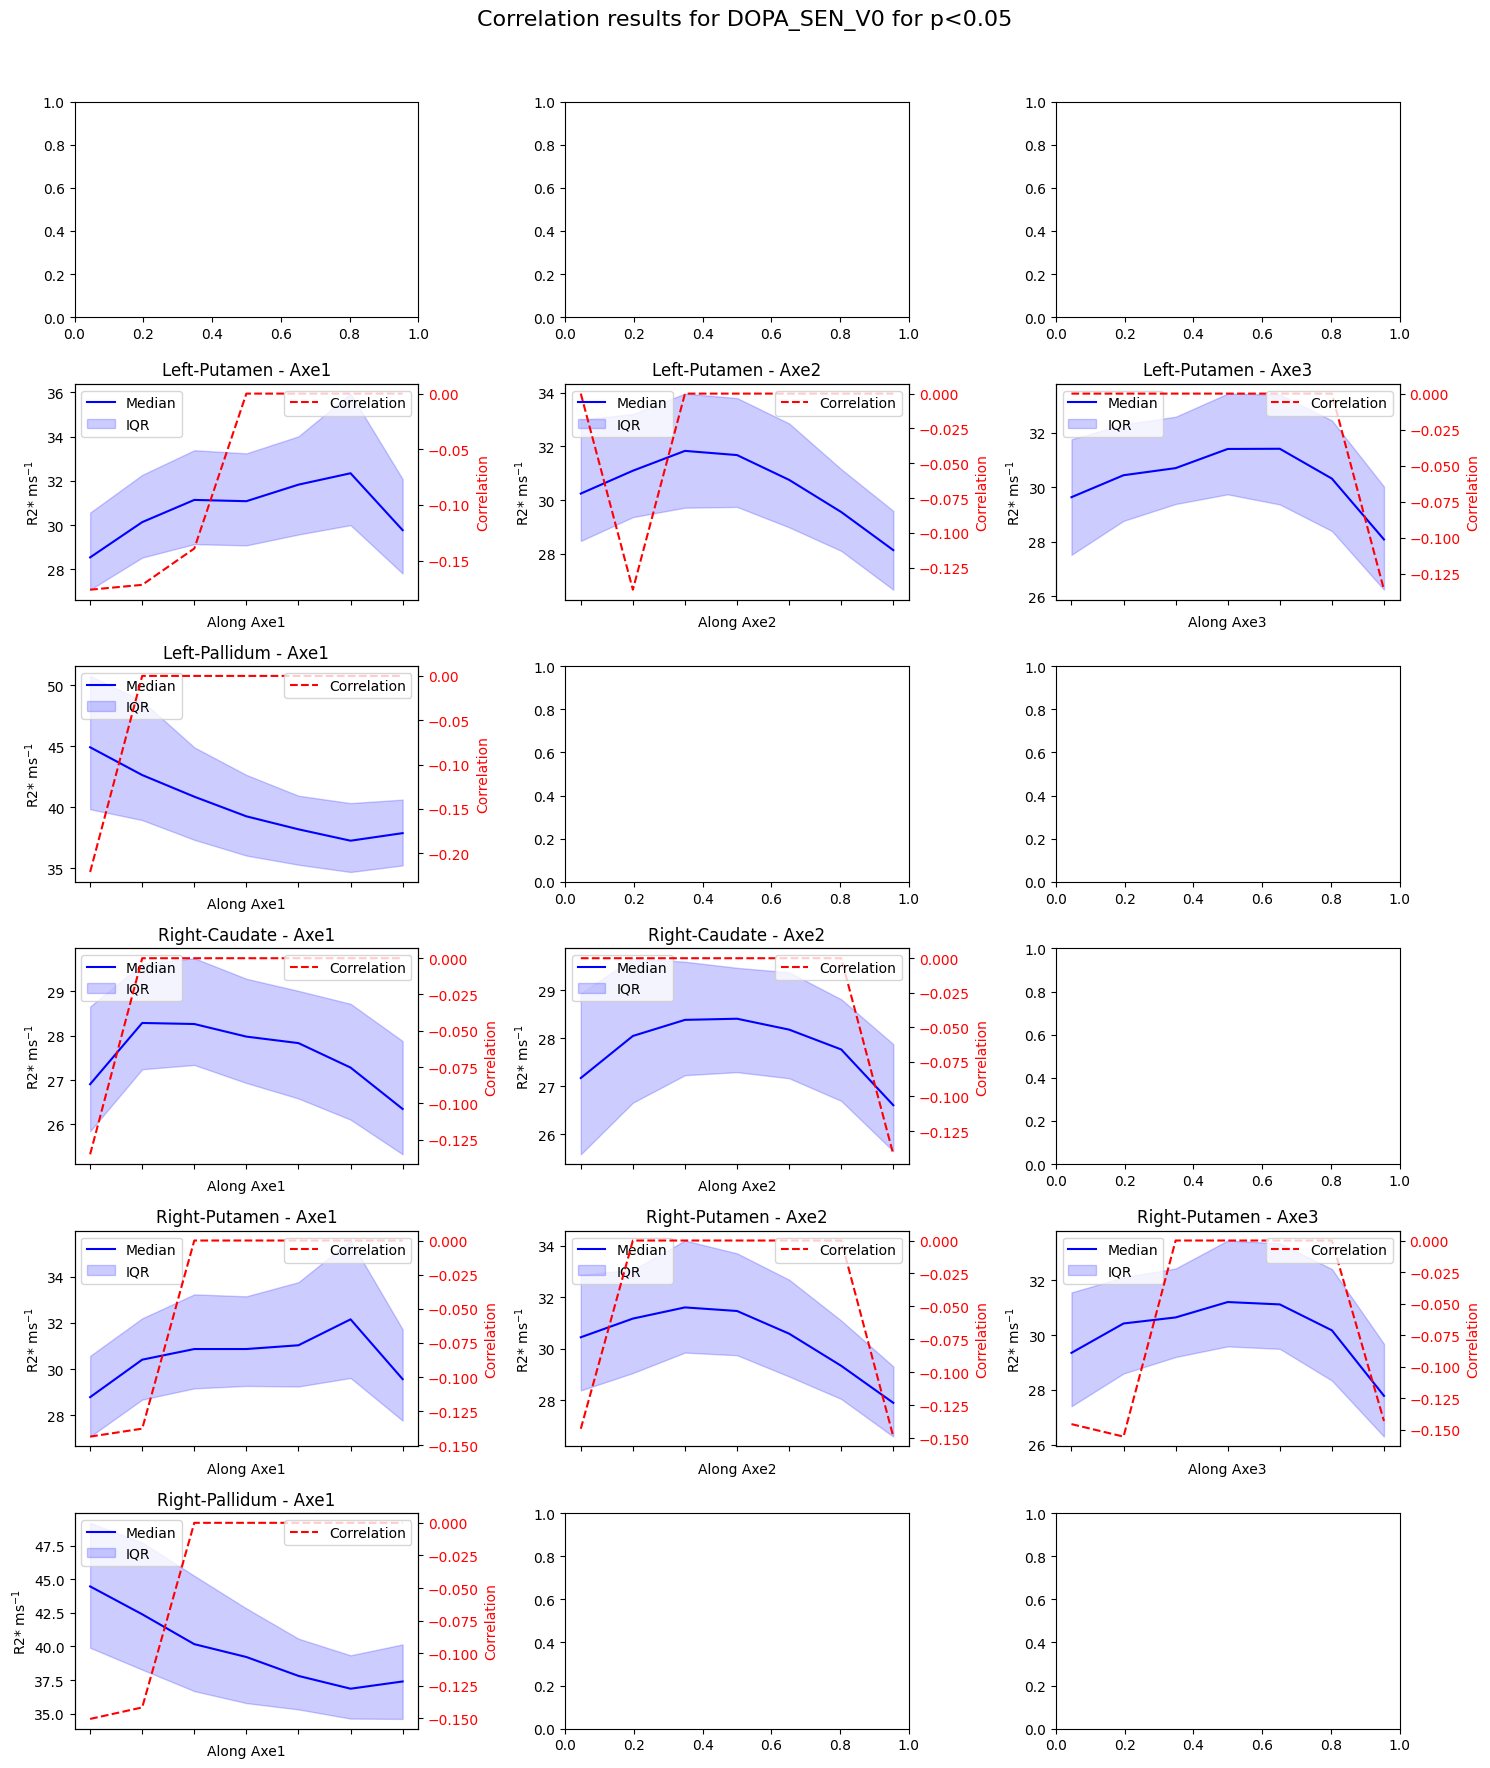

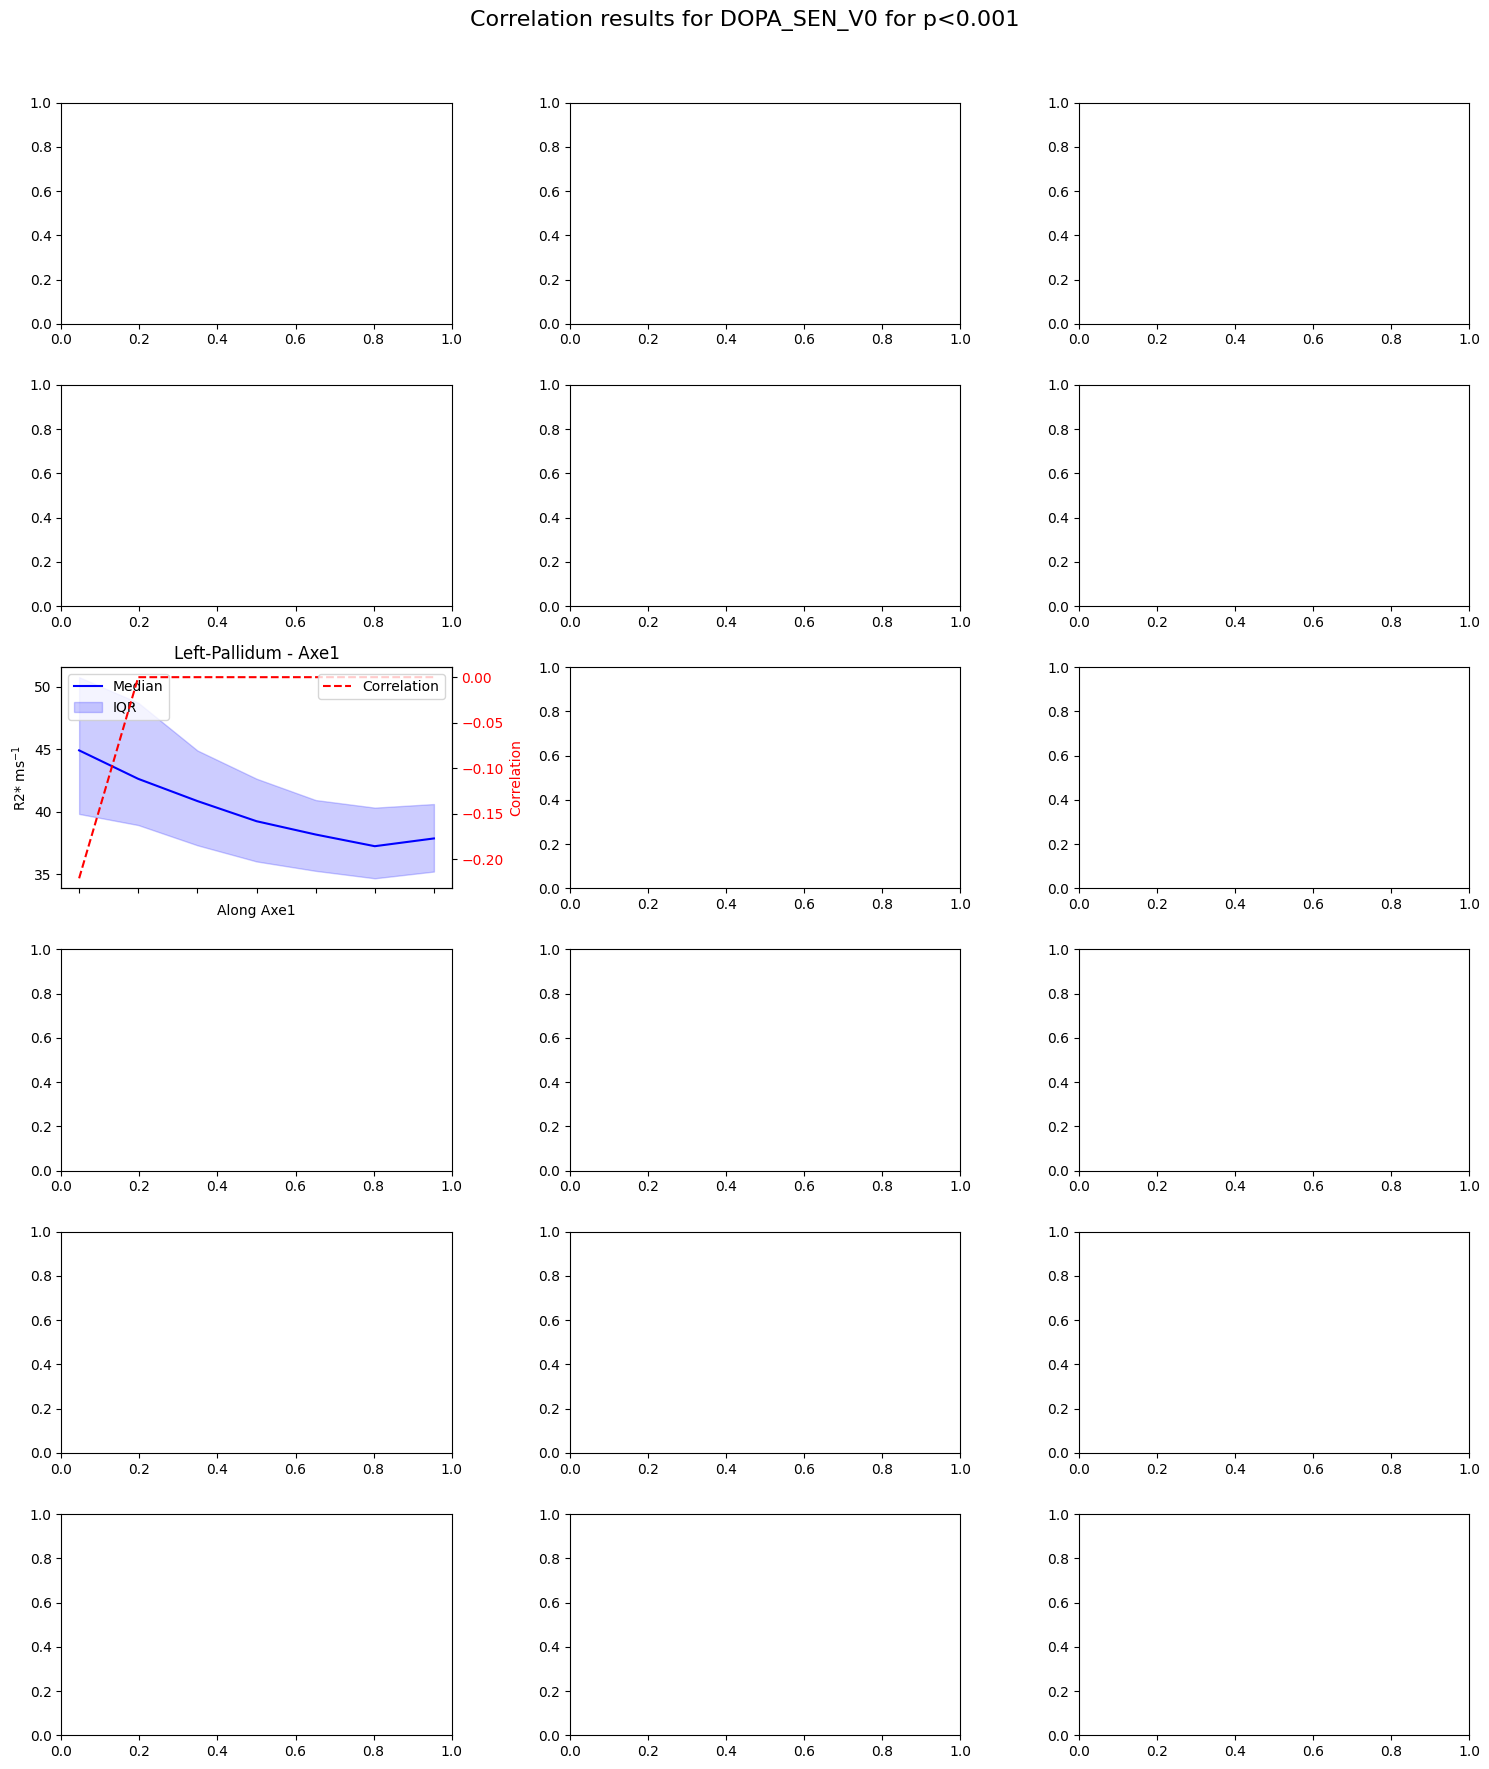

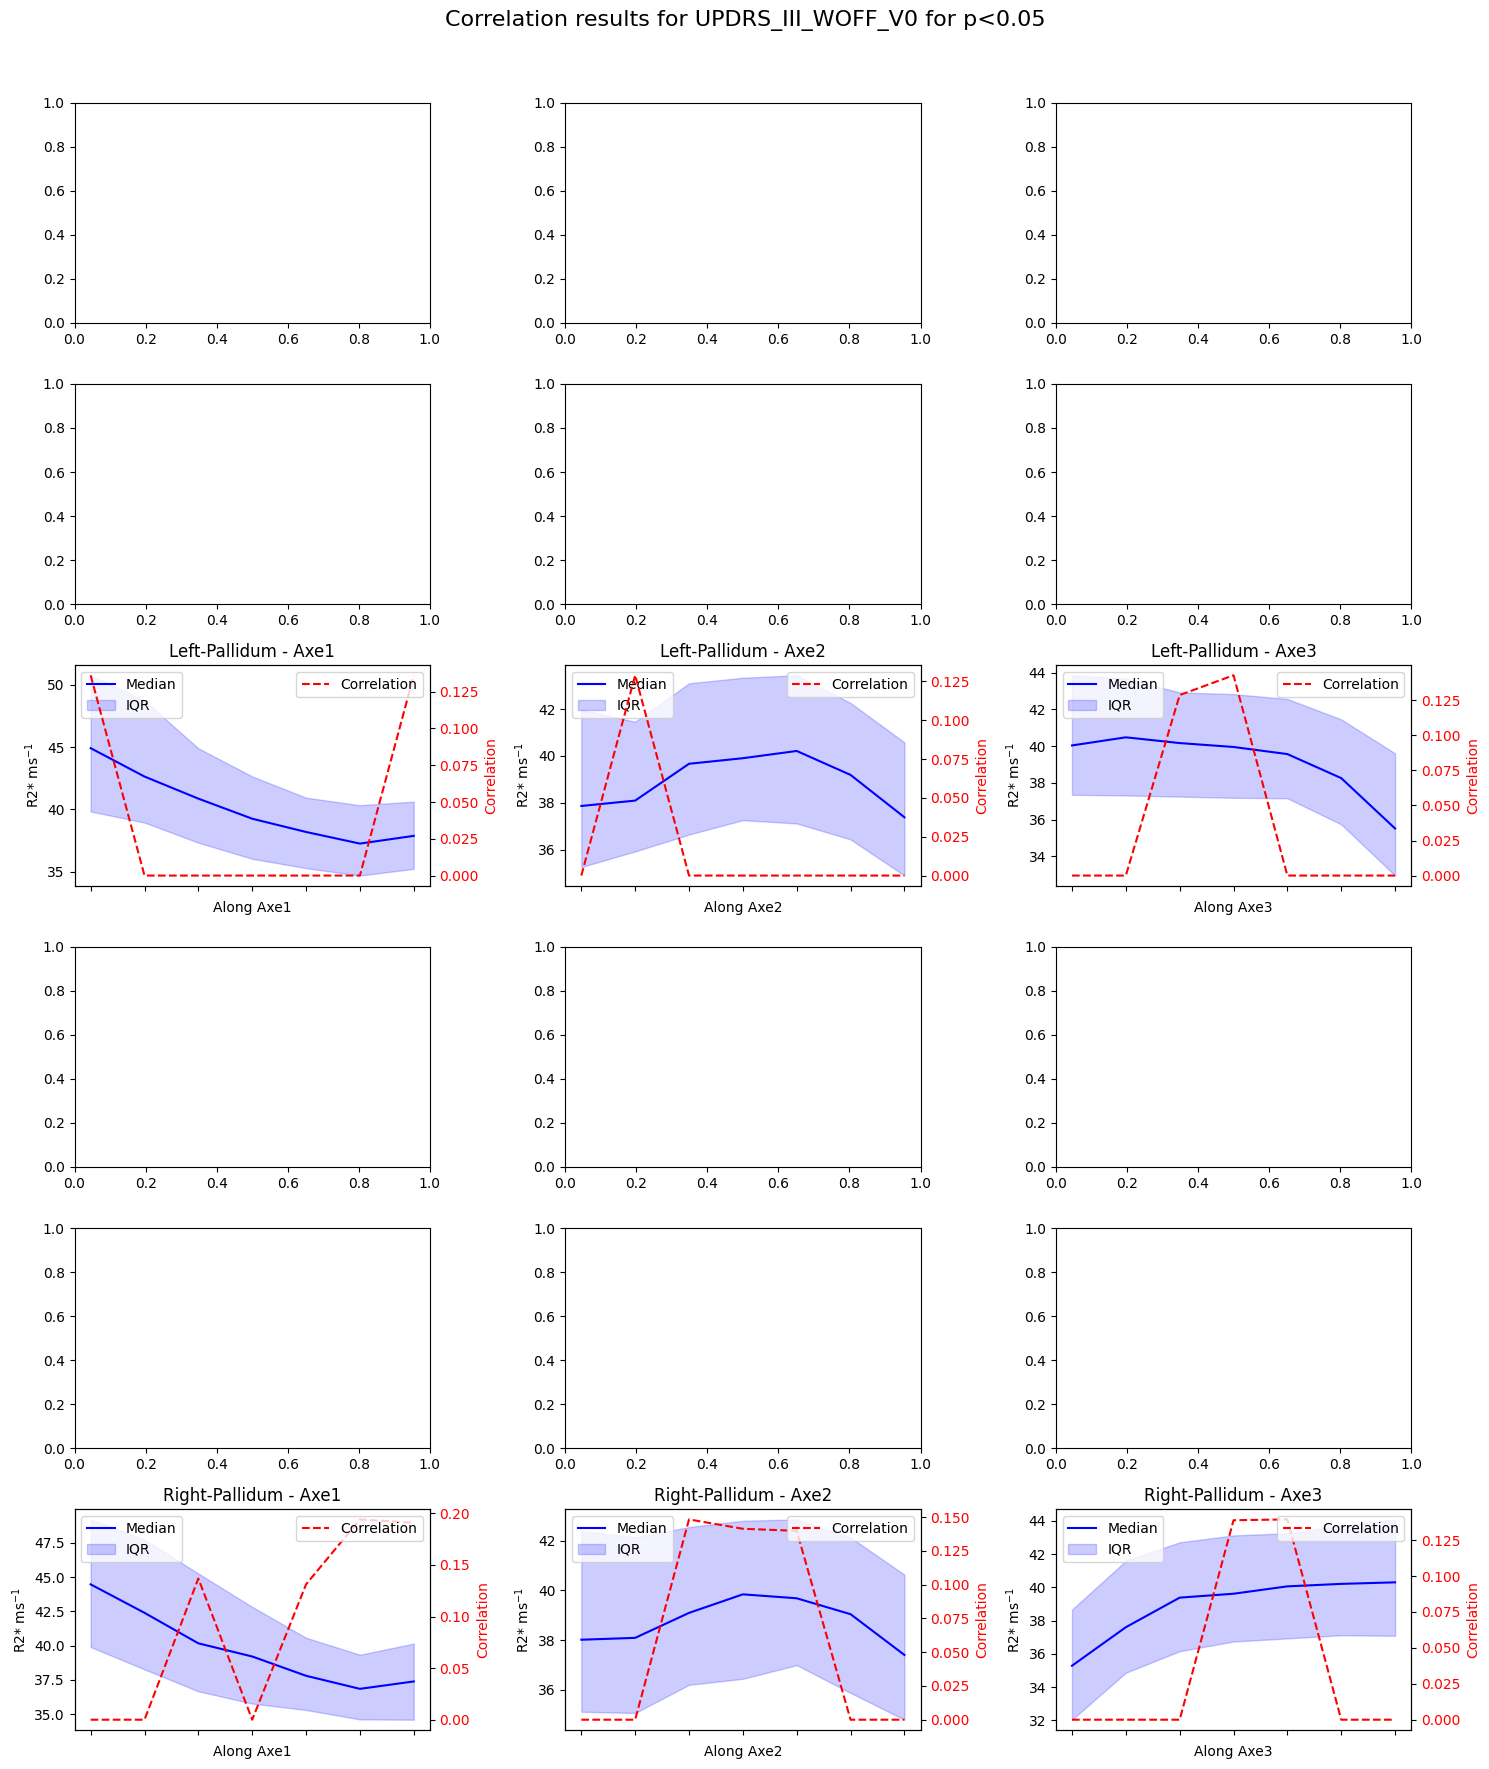

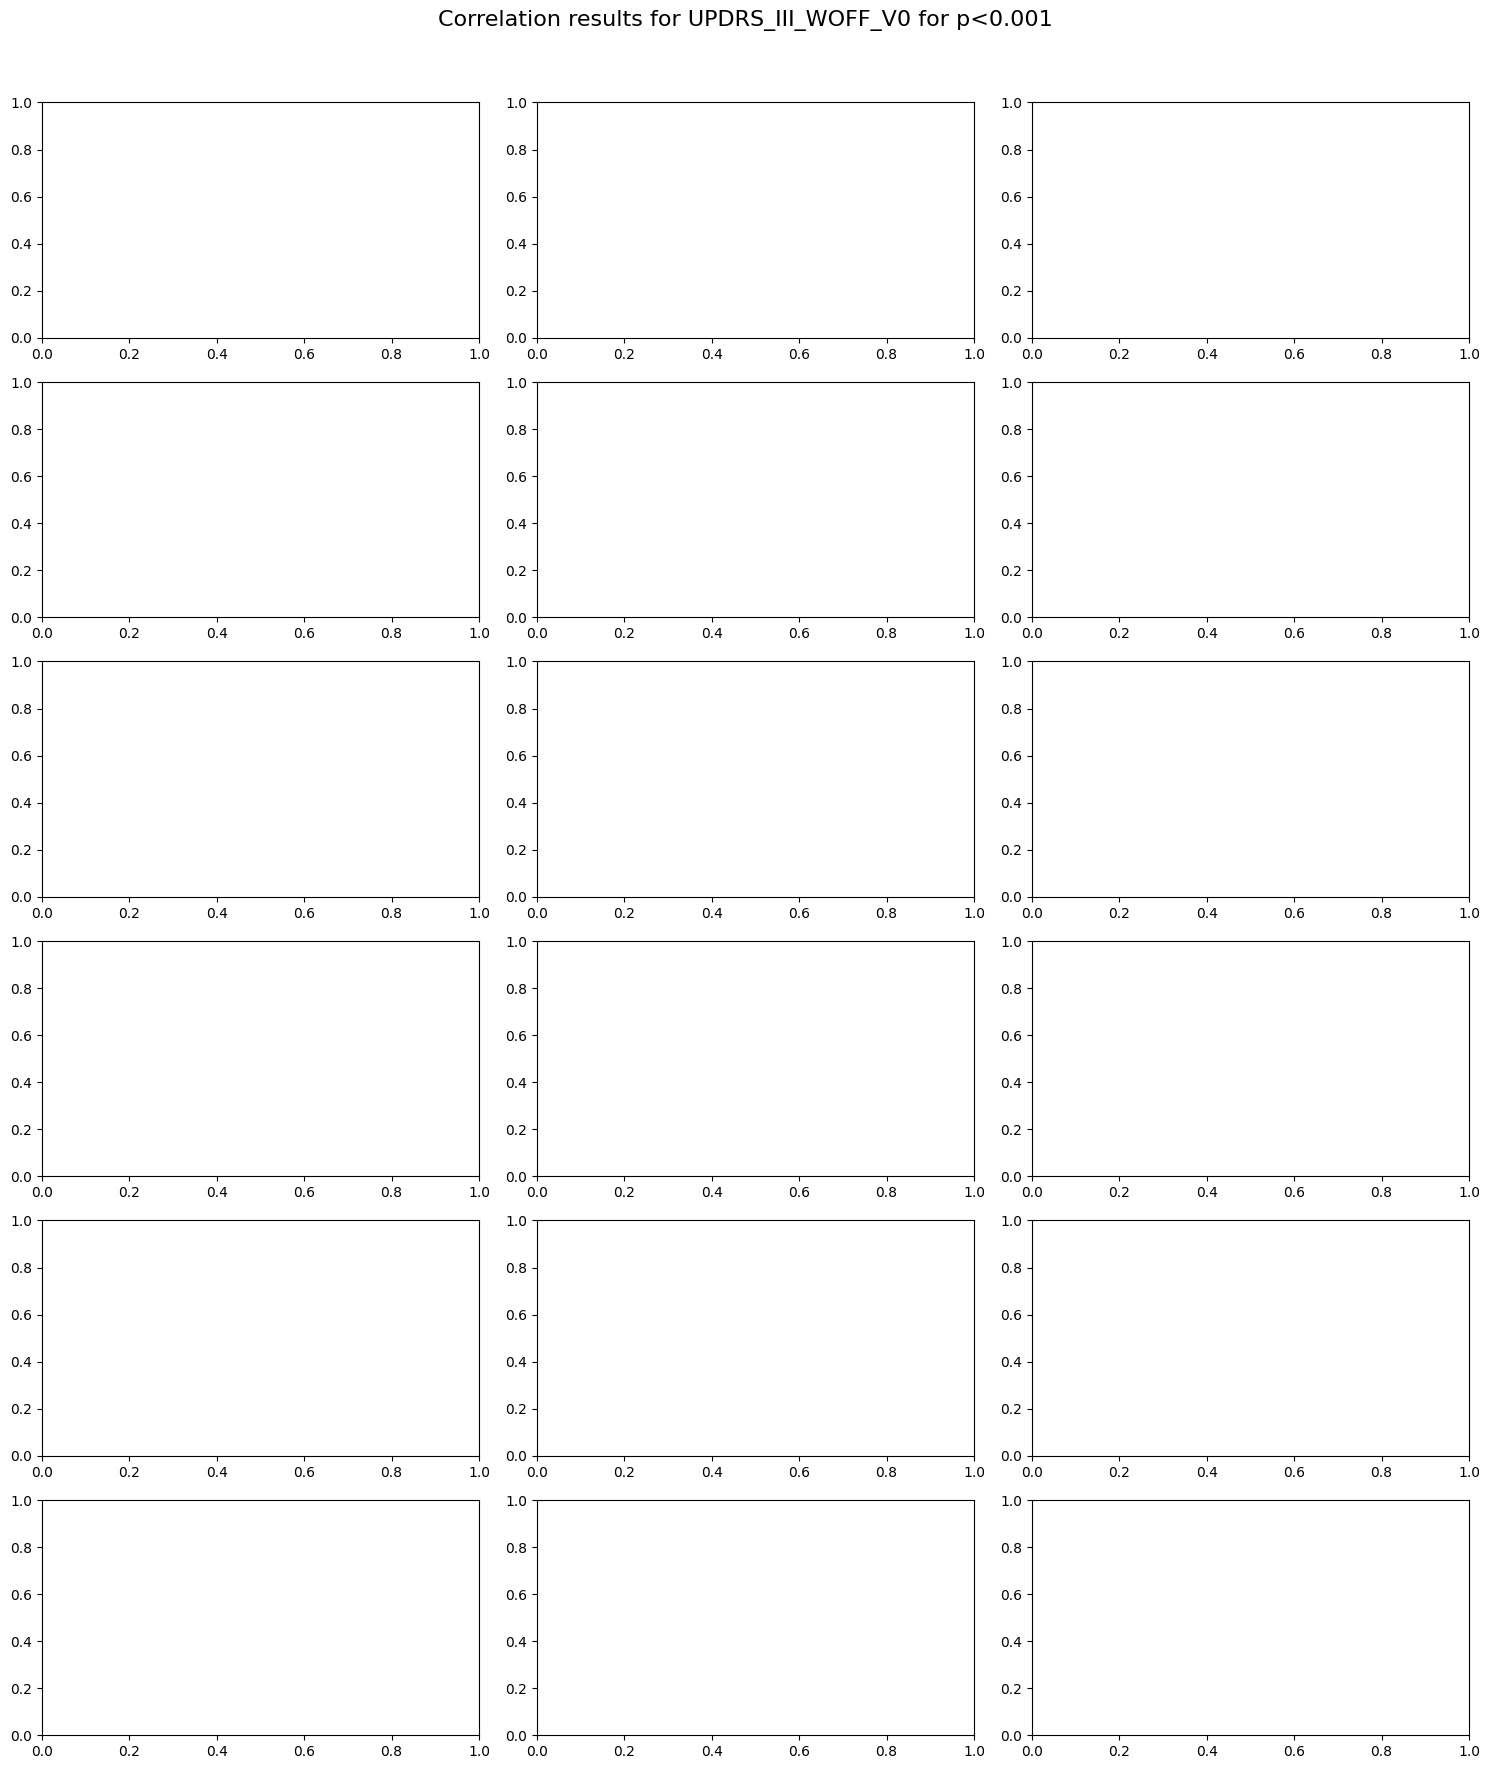

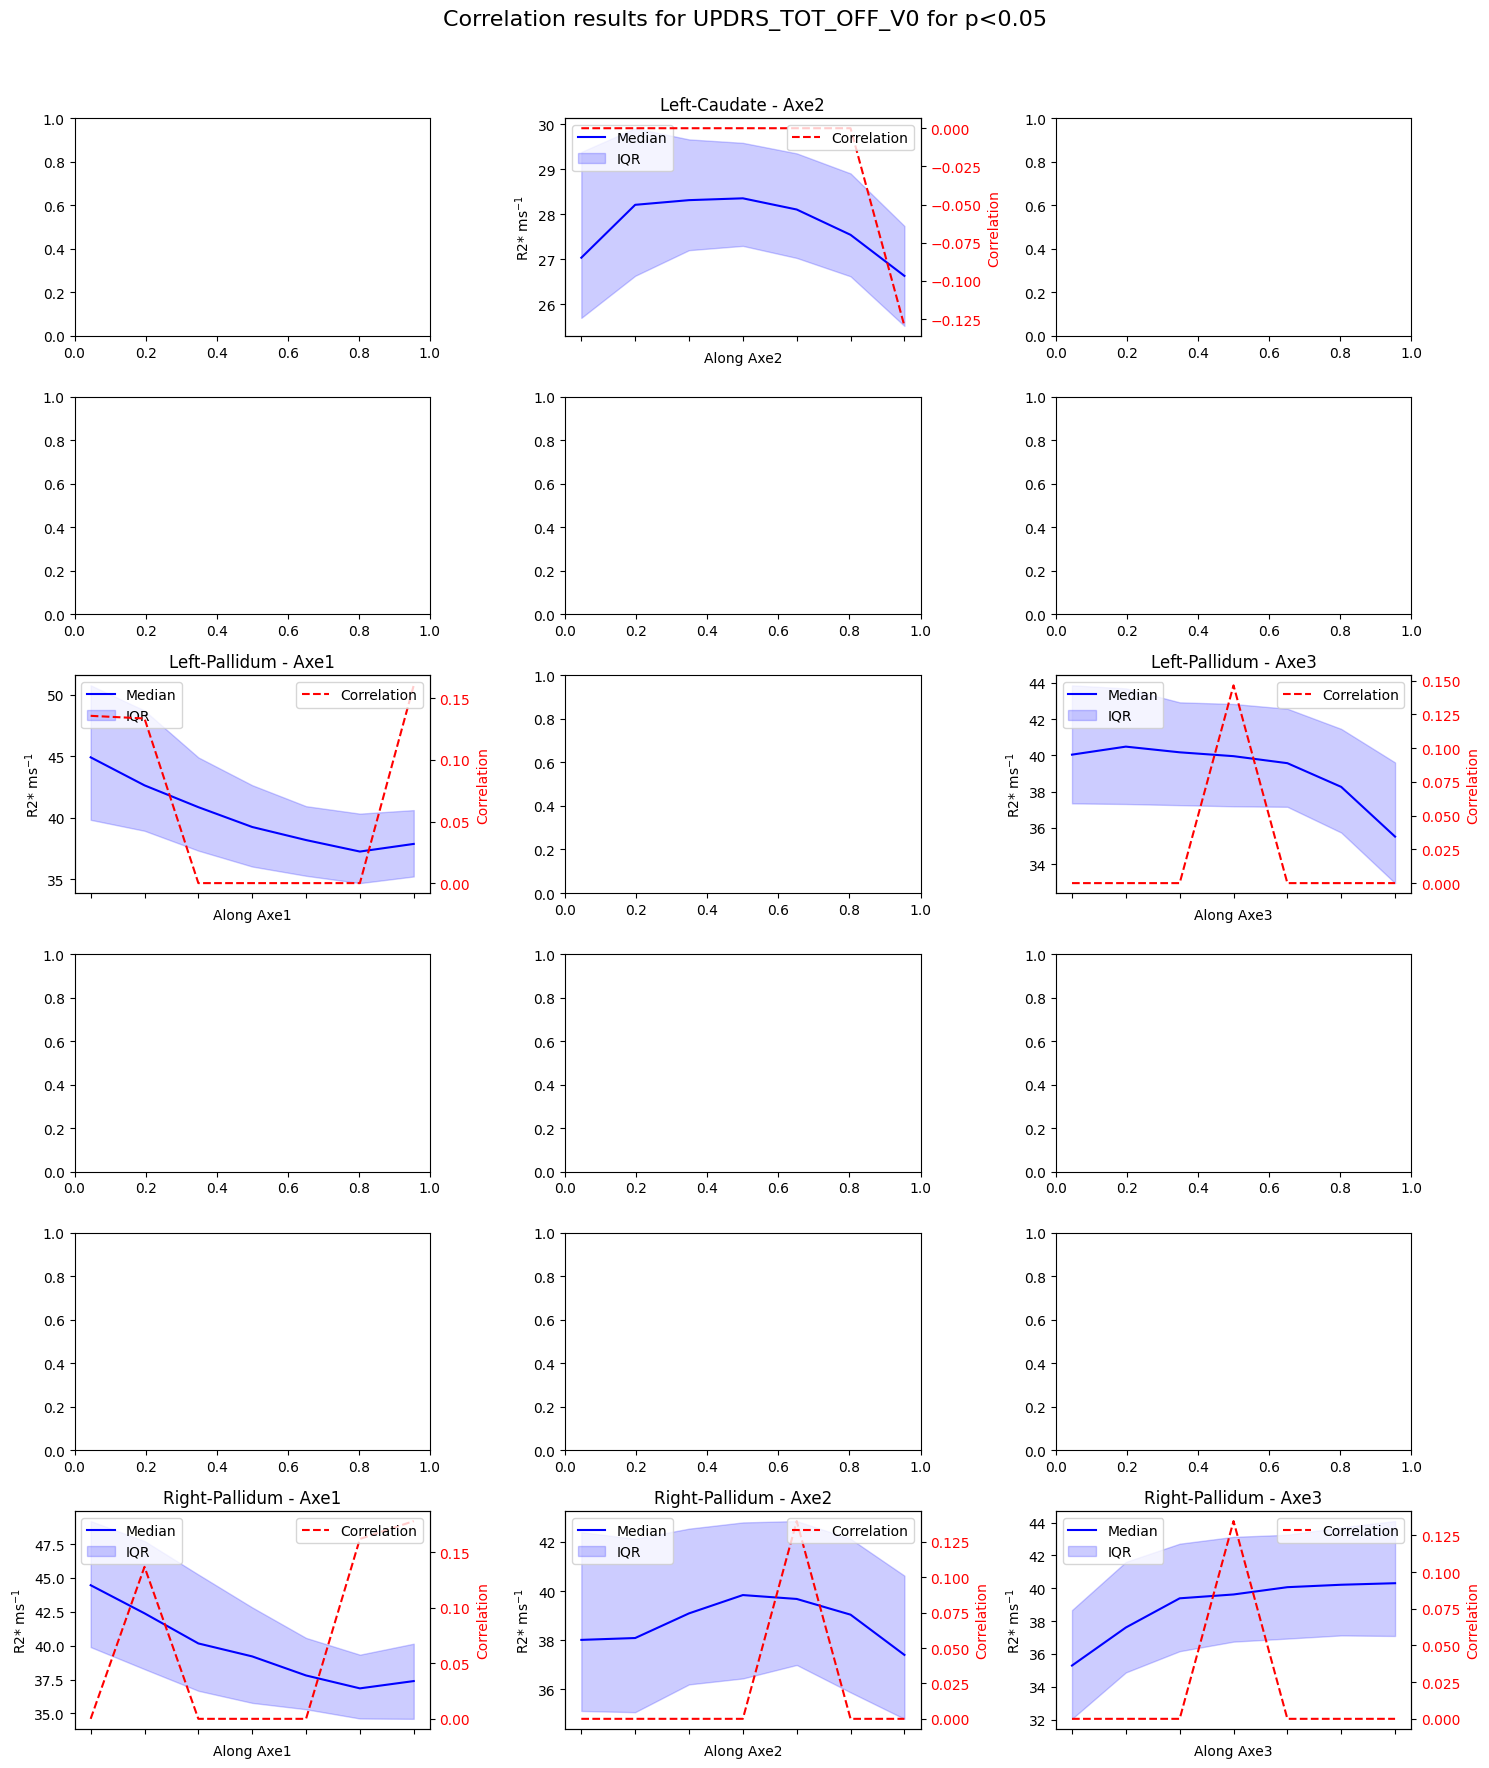

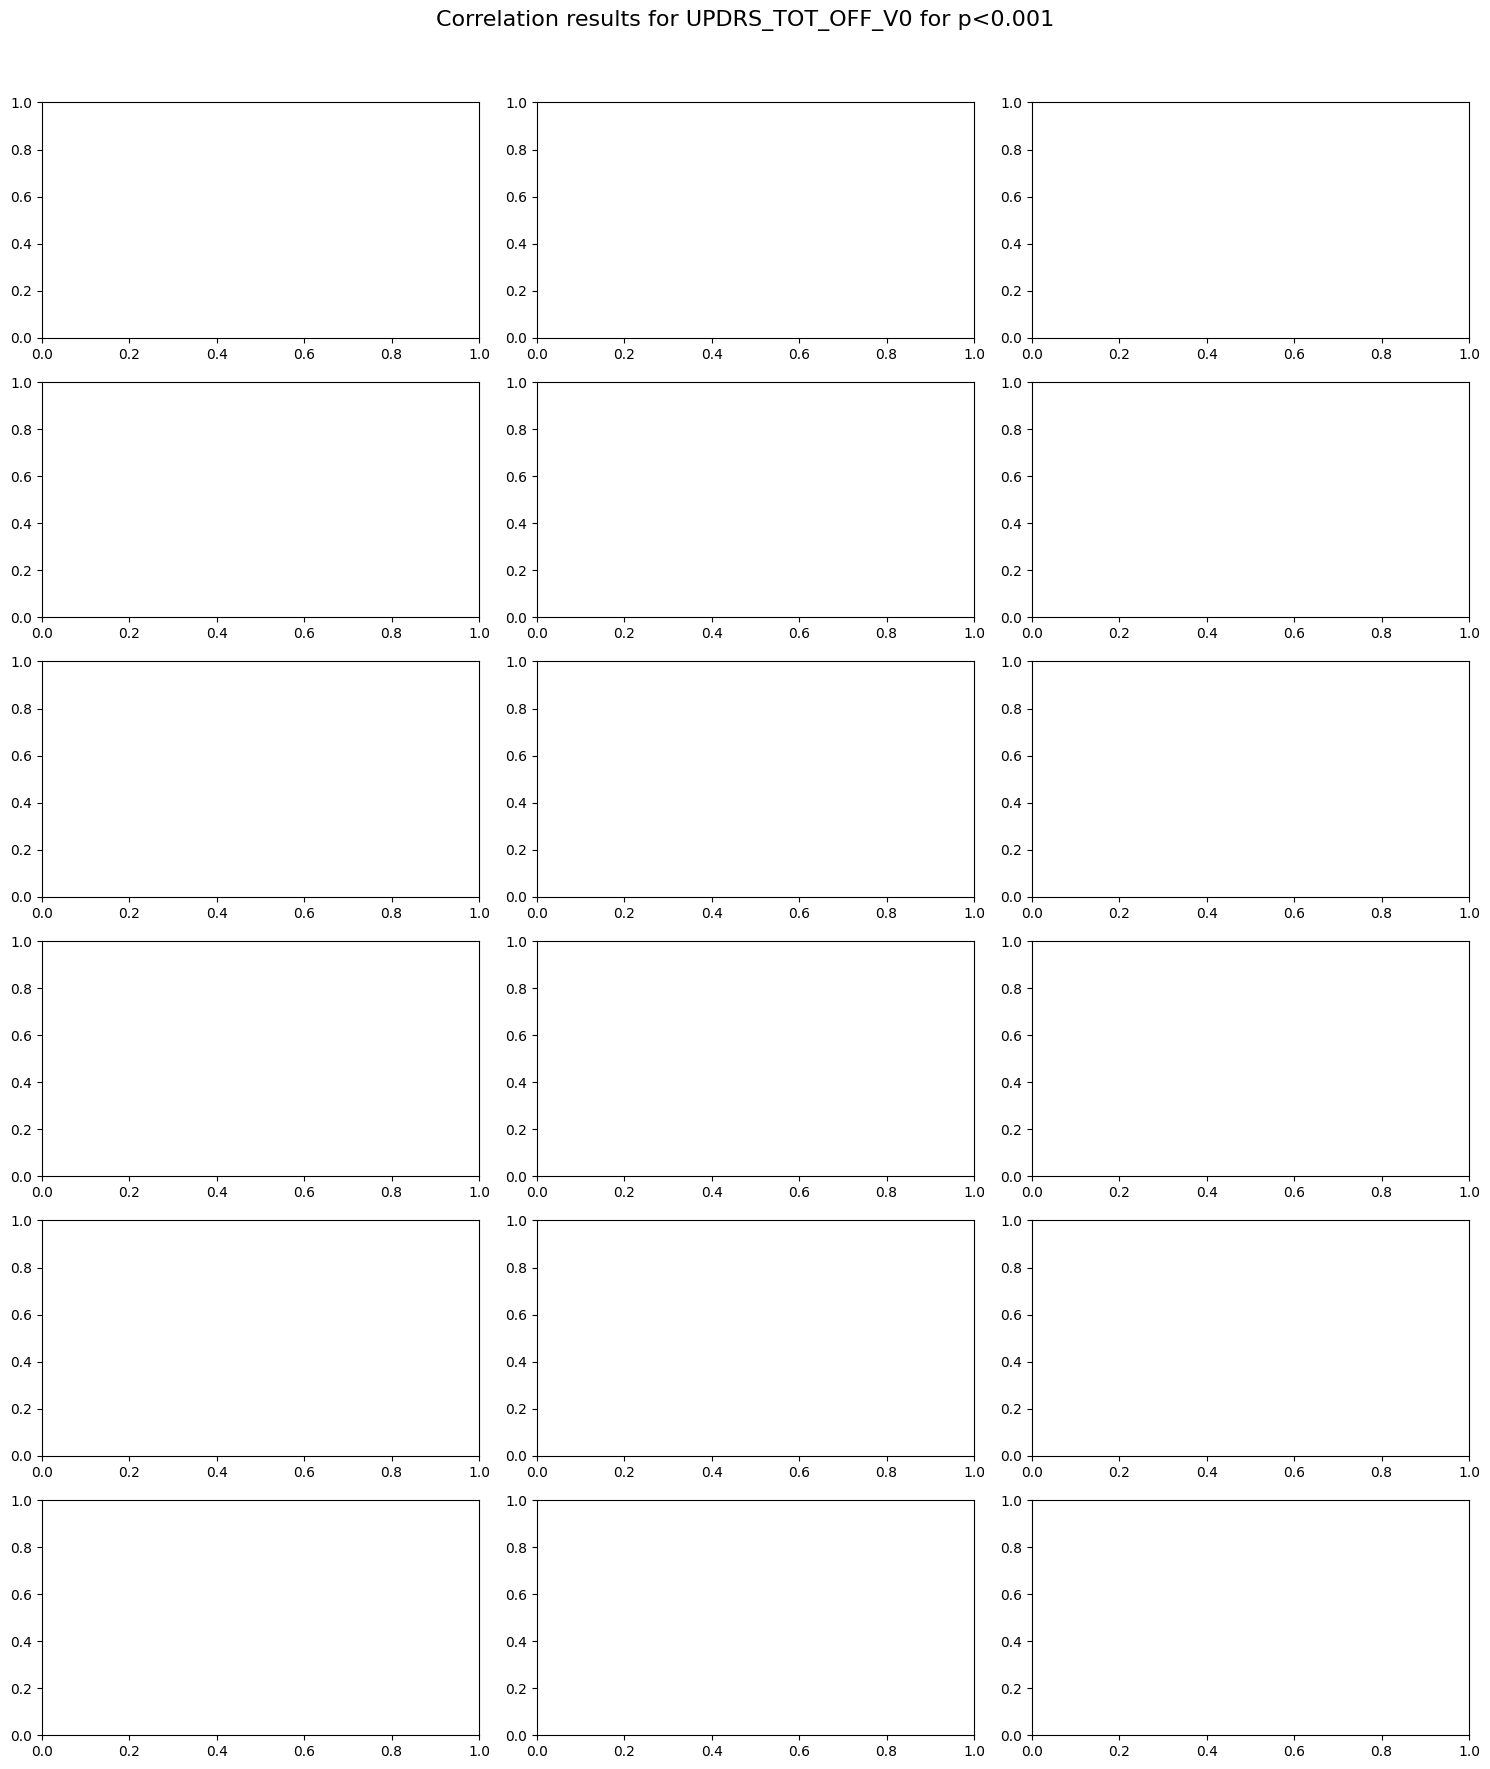

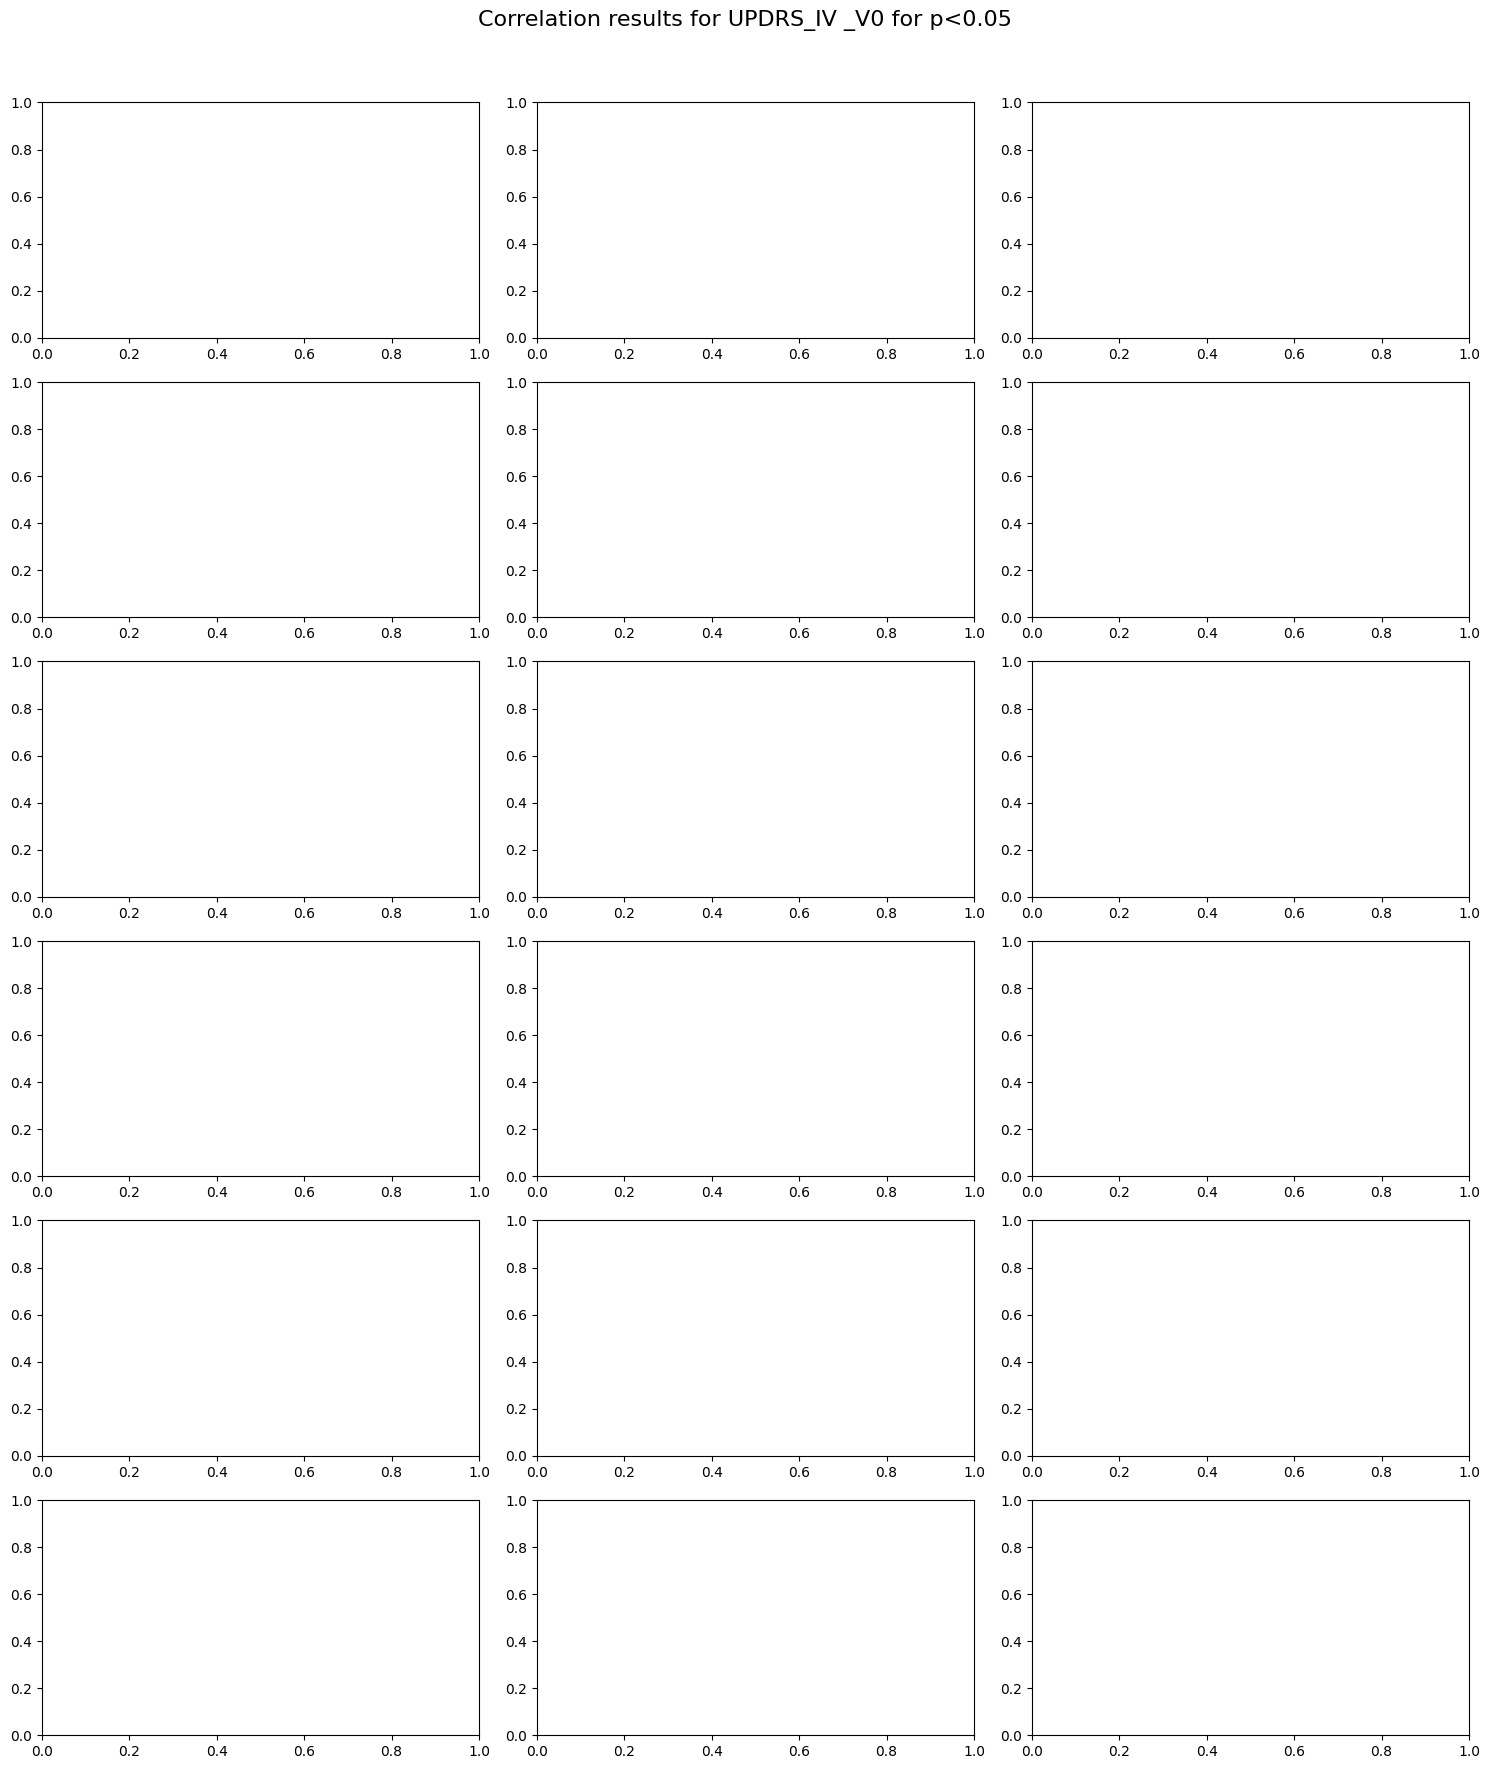

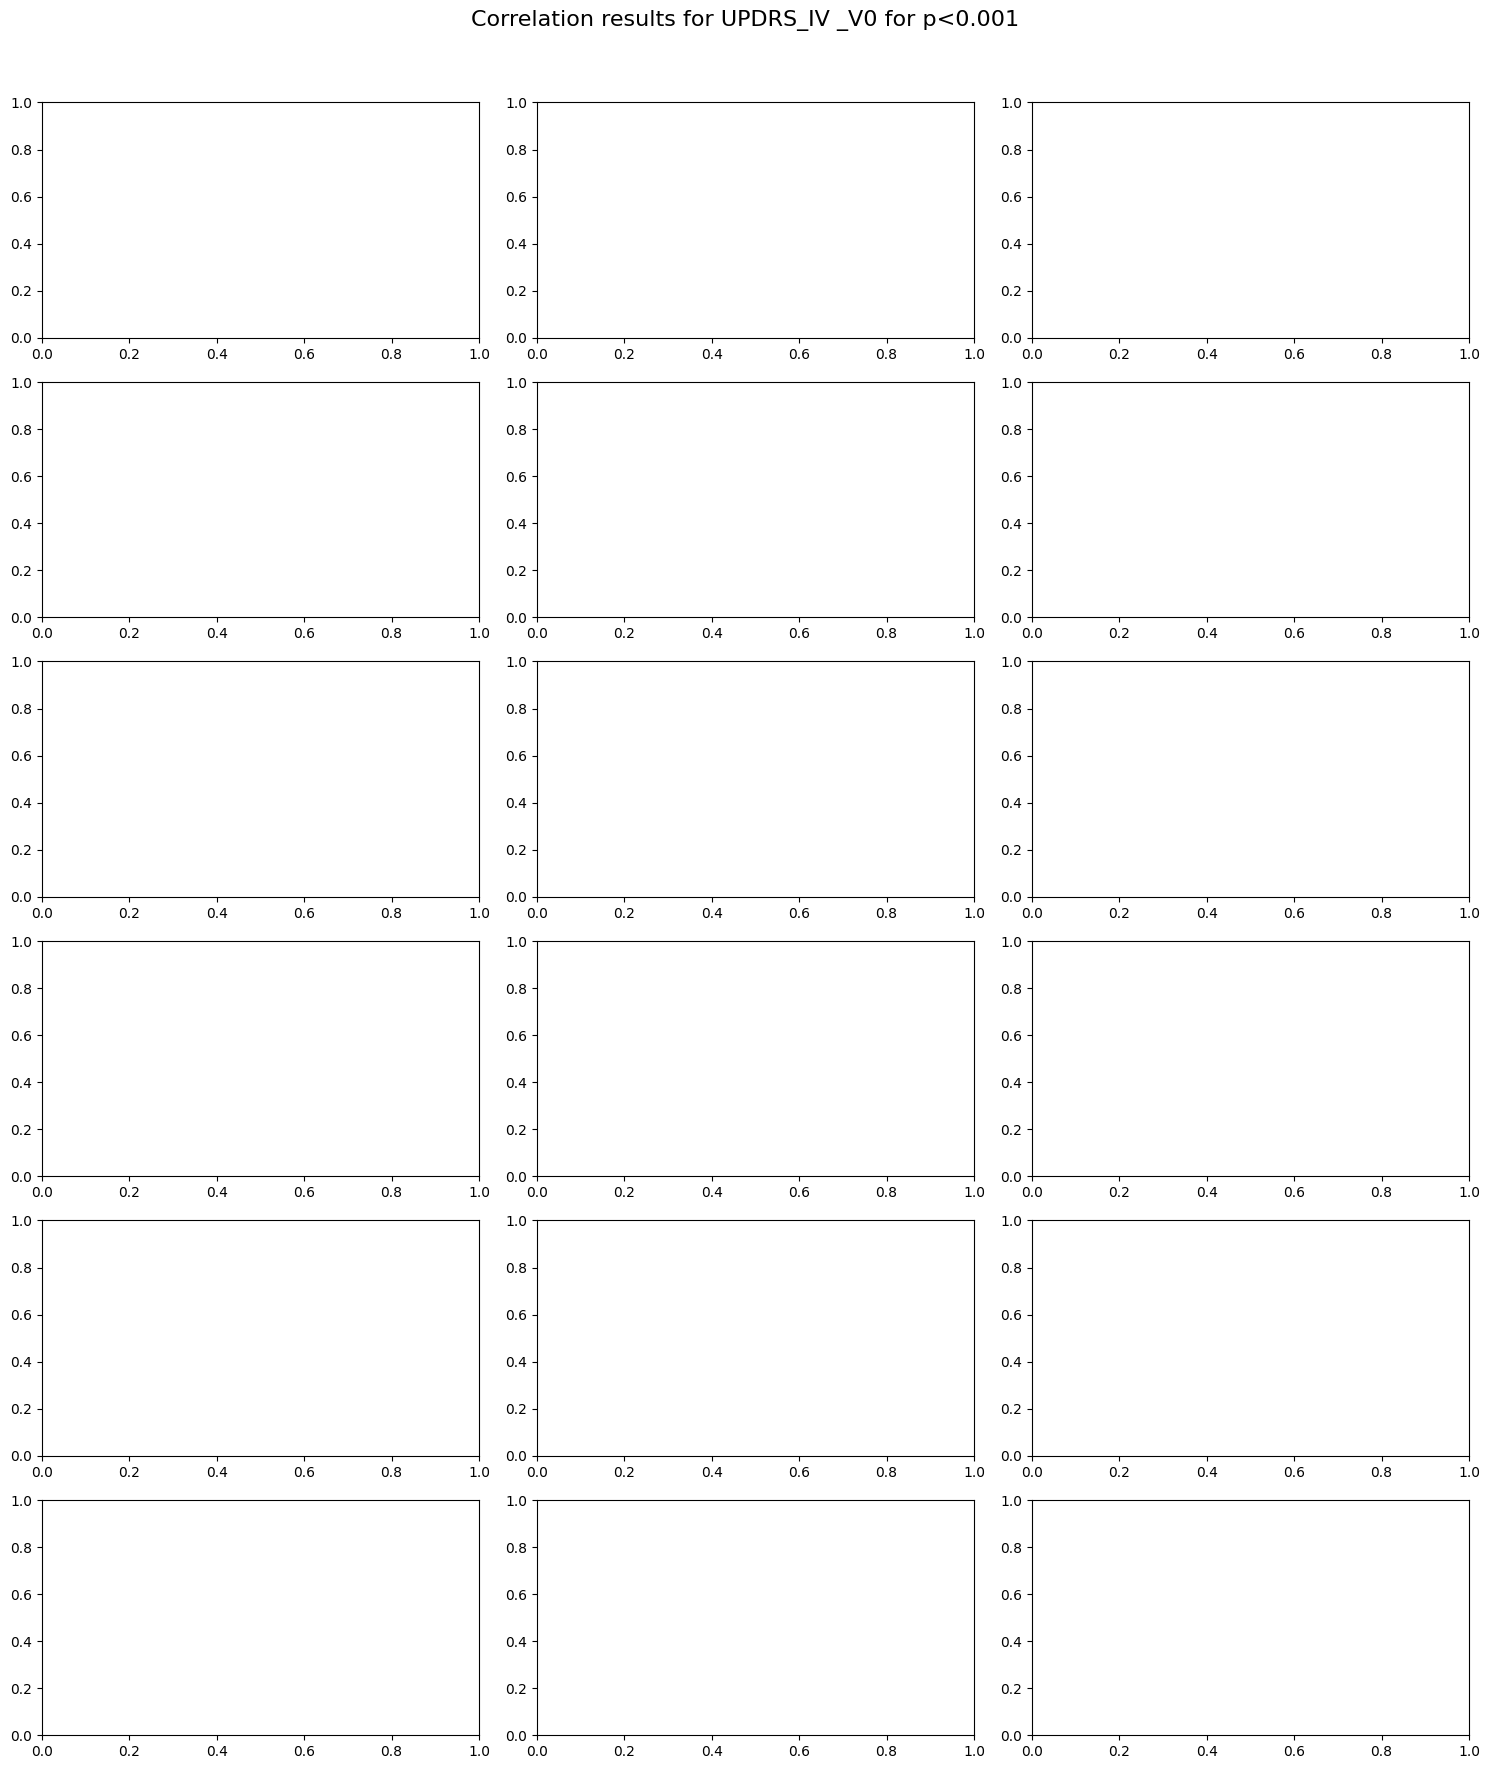

In [247]:
def plot_mean_and_deviation(dict_of_dicts, correlation_results, target, use_median=False, ymin=None, ymax=None, p_value_threshold=0.001):
    axes = ['Axe1', 'Axe2', 'Axe3']
    
    fig, axs = plt.subplots(len(listofROI), len(axes), figsize=(15, 3 * len(listofROI)))
    fig.suptitle(f'Correlation results for {target} for p<{str(p_value_threshold)}', fontsize=16)
    
    for i, structure in enumerate(listofROI):
        for j, axe in enumerate(axes):
            data = dict_of_dicts[structure][axe]
            p_values = correlation_results[target][structure][axe]['P-value']
            correlations = correlation_results[target][structure][axe]['Correlation']
            
            if (p_values < p_value_threshold).any():
                # Apply threshold to correlations
                correlations = correlations.where(p_values < p_value_threshold, 0)
                
                if use_median:
                    central_values = data.median(axis=0)
                    lower_bound = data.quantile(0.25, axis=0)
                    upper_bound = data.quantile(0.75, axis=0)
                else:
                    central_values = data.mean(axis=0)
                    lower_bound = central_values - data.std(axis=0)
                    upper_bound = central_values + data.std(axis=0)

                ax1 = axs[i, j]
                ax1.plot(central_values, label='Median' if use_median else 'Mean', color='blue')
                ax1.fill_between(range(len(central_values)), lower_bound, upper_bound, color='blue', alpha=0.2, label='IQR' if use_median else 'Standard Deviation')
                ax1.set_title(f'{structure} - {axe}')
                ax1.set_xlabel(f'Along {axe}')
                ax1.set_ylabel('R2* ms$^{-1}$')
                ax1.legend(loc='upper left')
                
                # Set y-axis limits if provided
                if ymin is not None and ymax is not None:
                    ax1.set_ylim(ymin, ymax)
                
                # Remove x-axis tick labels
                ax1.set_xticks(range(len(central_values)))
                ax1.set_xticklabels([''] * len(central_values))
                
                # Create a second y-axis to plot correlations
                ax2 = ax1.twinx()
                ax2.plot(correlations, label='Correlation', color='red', linestyle='--')
                ax2.set_ylabel('Correlation', color='red')
                ax2.tick_params(axis='y', labelcolor='red')
                ax2.legend(loc='upper right')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(os.path.join(pl.STUDY_PATH, 'code','mrGrad_AvivMezer',f'{target}_{str(p_value_threshold)}.png'))
    plt.show()

for target in listofTarget:
    plot_mean_and_deviation(dict_of_dicts, correlation_results, target, use_median=True,p_value_threshold=0.05)
    plot_mean_and_deviation(dict_of_dicts, correlation_results, target, use_median=True,p_value_threshold=0.001)